<a href="https://colab.research.google.com/github/malacosteus/MSAI/blob/main/ML/Lab1_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/22s_msai/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

--2022-05-14 14:00:11--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/22s_msai/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-05-14 14:00:11 (4.86 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,824,106,55,96,196,60,12,221,30,25,173,225,717,214,72,9,13,186,196
1,132,97,42,101,186,59,9,186,36,22,138,208,511,168,67,7,41,194,206
2,829,95,49,82,139,56,11,159,43,20,162,173,365,185,75,7,10,182,191
3,560,105,55,96,181,56,9,219,30,25,175,231,713,216,74,4,5,187,194
4,539,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
5,359,100,49,96,206,63,9,186,35,22,156,202,519,176,62,3,5,197,205
6,229,86,41,64,148,61,5,150,45,19,138,165,333,173,80,5,8,182,185
7,144,95,45,80,186,62,7,164,40,20,145,188,406,178,65,11,18,199,204
8,728,85,36,72,127,56,7,127,54,18,125,144,233,123,70,3,30,184,194
9,123,90,36,57,130,57,6,121,56,17,127,137,216,132,68,22,23,190,195


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,417.754098,93.256831,44.801457,81.697632,168.012750,61.586521,8.462659,167.978142,41.132969,20.517304,147.845173,187.719490,435.429872,174.642987,72.526412,6.222222,12.249545,188.797814,195.435337
std,247.982037,8.183211,6.258915,15.742905,34.292934,7.863472,4.101914,33.184172,7.802219,2.579780,14.727813,31.194843,176.237318,33.181816,7.441360,4.870005,8.627618,6.215497,7.425660
min,0.000000,73.000000,33.000000,40.000000,104.000000,48.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,197.000000,87.000000,40.000000,70.000000,139.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,148.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,421.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,362.000000,174.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,634.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,579.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

We can see tht data oes not have null fields, moreover all elements of our features have int64 type. It means that we don't need to correct null data or wrong data formats.

We can see that our column have very different means, deviations, minimum and maximum values. Generally we want to have all features of dataset in the same range for ML algorithms. So we need to apply StandartScaler() to our data in order to normalize it

We apply StandartScaler() inside the pipeline in each tsk, so we do not apply it here 

In [ ]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
#sc = StandardScaler()
#sc.fit(X_train)
#X_train = sc.transform(X_train)
#X_test  = sc.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
### YOUR CODE HERE
# automaticlly do crossvalidation and select best model
clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)

ppl = Pipeline(steps=[("Normalization", StandardScaler()), ("classifier", clf)])

ppl.fit(X_train, y_train)

Pipeline(steps=[('Normalization', StandardScaler()),
                ('classifier',
                 LogisticRegressionCV(max_iter=500, multi_class='multinomial',
                                      random_state=0, solver='saga',
                                      tol=0.001))])

In [ ]:
y_pred = ppl.predict(X_test)
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
#print(f1_score(y_test, y_pred, average=None))

0.7946127946127947
0.7919612794612795


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

!pip install scikit-plot

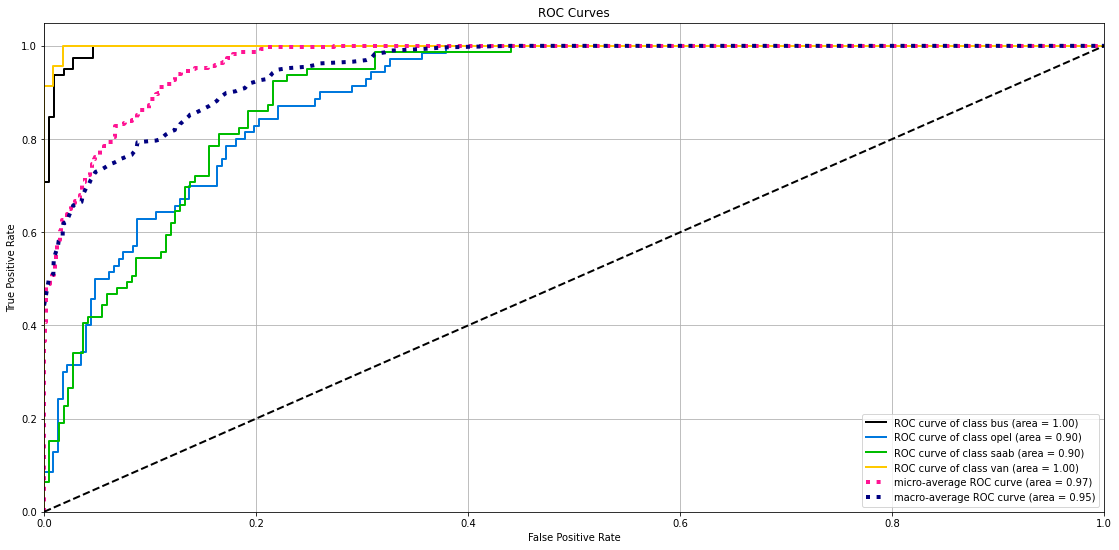

In [ ]:
import scikitplot
import matplotlib.pyplot as plt

scikitplot.metrics.plot_roc(y_test, ppl.predict_proba(X_test), figsize=(19,9))
plt.grid()
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA(n_components=19)
pca.fit(StandardScaler().fit_transform(X_train))
#print(X_train.shape)
#print(pca.transform(X_train).shape)

PCA(n_components=19)

In [ ]:
print(pca.explained_variance_ratio_)

[4.99908556e-01 1.61479755e-01 9.55629405e-02 6.04207798e-02
 5.19212009e-02 4.83692606e-02 2.88129557e-02 1.83169780e-02
 1.20603842e-02 7.92575715e-03 4.81166410e-03 3.39427298e-03
 2.21869767e-03 1.89007922e-03 1.07347059e-03 8.63109666e-04
 6.33551743e-04 3.17611558e-04 1.89745626e-05]


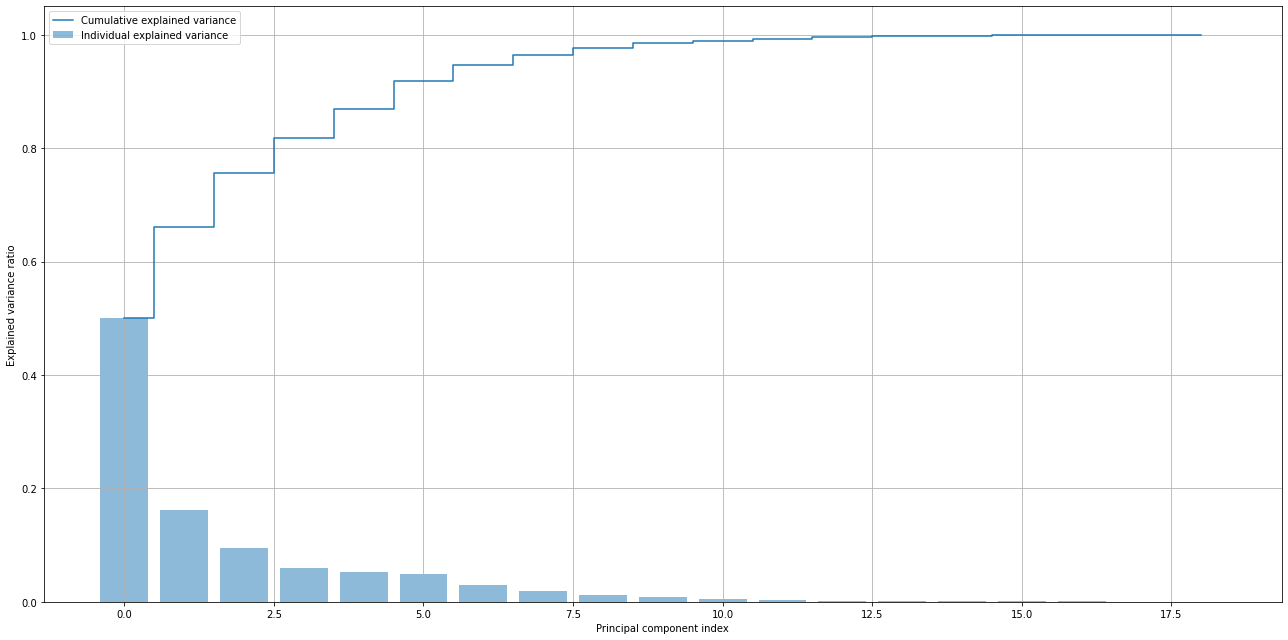

In [ ]:
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
#
# Create the visualization plot
#
plt.figure(figsize=(18,9))
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

We choose 15-component PCA. We can see that after 15-th component in explaided variance plot we can't even see the eigenvalue. So it almost don't gie as any additiona information. Althrough eigenvalue of 15th component is very small is much bigger compared to the smallest eigenvalue. So, it can add some additional information for our classifier. Because of that I decided to use 15-component PCA

We should normalize our data before PCA.
The PCA calculates a new projection of feaures. New axis are based on the standard deviation of variables. A feature with a high standard deviation will have a higher weight for the calculation of axis compared to a feature with a low standard deviation. We should normalize our data normalize bcause of that.

In [ ]:
### YOUR CODE HERE
pca = PCA(n_components= 15)
clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)

ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca)])
New_data = ppl.fit_transform(X_train, y_train)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE
#scl = StandardScaler()
pca = PCA(n_components= 15)
clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)

ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])
ppl.fit(X_train, y_train)
#X1 = scl.fit_transform(X_train)
#X2 = pca.fit_transform(X1)
#clf.fit(X2, y_train)

Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 LogisticRegressionCV(max_iter=500, multi_class='multinomial',
                                      random_state=0, solver='saga',
                                      tol=0.001))])

In [ ]:
y_pred = ppl.predict(X_test)
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
#print(f1_score(y_test, y_pred, average=None))

0.7845117845117845
0.7829712589138914


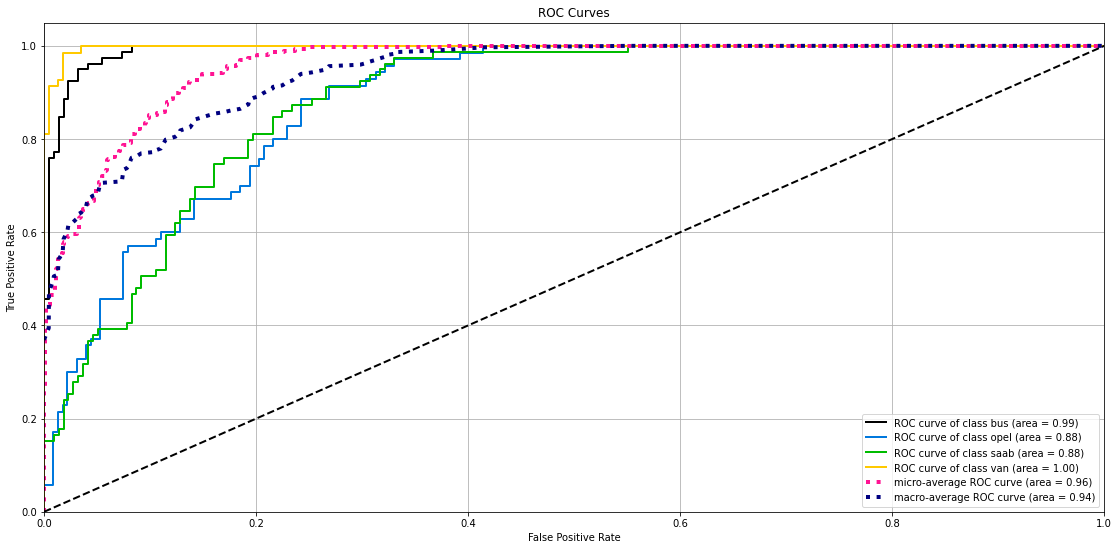

In [ ]:
scikitplot.metrics.plot_roc(y_test, ppl.predict_proba(X_test), figsize=(19,9))
plt.grid()
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
pca = PCA(n_components=15)

parameters = {'max_depth':range(1, 15)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

ppl.fit(X_train, y_train)


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=4,
                              param_grid={'max_depth': range(1, 15)}))])

In [ ]:
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

ppl_best = Pipeline(steps=[("Normalize", StandardScaler()),("PCA", pca), ("classifier", clf.best_estimator_)])
ppl_best.fit(X_train, y_train)

0.6284070058381985 {'max_depth': 6}


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, random_state=0))])

In [ ]:
y_pred = ppl_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.6936026936026936
0.6936026936026936
0.6901113322706218
0.6911742967837159
[0.8625     0.54545455 0.56375839 0.78873239]


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier

acc_save = []
f1_save = []
nm_lrs = []
for ans_size in range(2, 100, 5):
    pca = PCA(n_components= 15)
    clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)
    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

    bclf = BaggingClassifier(base_estimator=ppl, n_estimators=ans_size, random_state=0).fit(X_train, y_train)

    print(f"Boostrap size {ans_size}")
    y_pred = bclf.predict(X_test)
    acc_save.append(accuracy_score(y_test, y_pred))
    f1_save.append(f1_score(y_test, y_pred, average='weighted'))
    nm_lrs.append(ans_size)
    print(accuracy_score(y_test, y_pred))
    #print(f1_score(y_test, y_pred, average='micro'))
    #print(f1_score(y_test, y_pred, average='macro'))
    print(f1_score(y_test, y_pred, average='weighted'))
    #print(f1_score(y_test, y_pred, average=None))
    print("\n")

Boostrap size 2
0.7474747474747475
0.744150241469967


Boostrap size 7
0.7777777777777778
0.7759159852309798


Boostrap size 12
0.7845117845117845
0.7829366414550315


Boostrap size 17
0.7845117845117845
0.7829366414550315


Boostrap size 22
0.7878787878787878
0.7861997328864798


Boostrap size 27
0.7878787878787878
0.7855239733825601


Boostrap size 32
0.7845117845117845
0.7822335071141742


Boostrap size 37
0.7845117845117845
0.7822335071141742


Boostrap size 42
0.7878787878787878
0.7855239733825601


Boostrap size 47
0.7878787878787878
0.7858121004785492


Boostrap size 52
0.7912457912457912
0.7897946457233489


Boostrap size 57
0.7878787878787878
0.7862523688997576


Boostrap size 62
0.7878787878787878
0.7862523688997576


Boostrap size 67
0.7878787878787878
0.7862523688997576


Boostrap size 72
0.7878787878787878
0.7862523688997576


Boostrap size 77
0.7878787878787878
0.7862523688997576


Boostrap size 82
0.7878787878787878
0.7862523688997576


Boostrap size 87
0.787878787878787

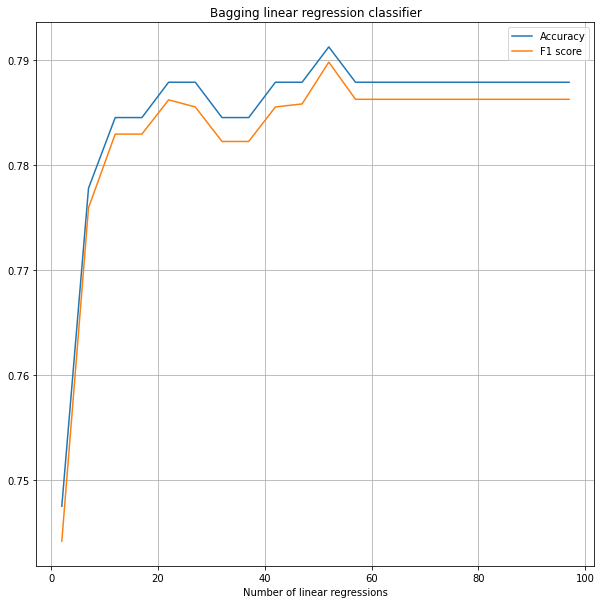

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(nm_lrs, acc_save)
plt.plot(nm_lrs, f1_save)
plt.grid()
plt.xlabel("Number of linear regressions")
plt.legend(["Accuracy", "F1 score"])
plt.title("Bagging linear regression classifier")
plt.show()

We can see that after 60 algorithms in bagging our performance starts to oscillate. So around 60 agorithms is an optimal number for bagging.

But loistic regression is stable algorithm, so our performance benefit is not too big compared to decision trees bagging.

In [ ]:
acc_save = []
f1_save = []
nm_lrs = []
for ans_size in range(2, 100, 5):
    pca = PCA(n_components=15)

    parameters = {'max_depth':range(1, 15)}
    clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

    bclf = BaggingClassifier(base_estimator=ppl, n_estimators=ans_size, random_state=0).fit(X_train, y_train)

    print(f"Boostrap size: {ans_size}")
    y_pred = bclf.predict(X_test)
    acc_save.append(accuracy_score(y_test, y_pred))
    f1_save.append(f1_score(y_test, y_pred, average='weighted'))
    nm_lrs.append(ans_size)
    print(accuracy_score(y_test, y_pred))
    #print(f1_score(y_test, y_pred, average='micro'))
    #print(f1_score(y_test, y_pred, average='macro'))
    print(f1_score(y_test, y_pred, average='weighted'))
    #print(f1_score(y_test, y_pred, average=None))
    print("\n")

Boostrap size: 2
0.6767676767676768
0.6743986266275671


Boostrap size: 7
0.7643097643097643
0.7660926047095613


Boostrap size: 12
0.797979797979798
0.7996214215119689


Boostrap size: 17
0.7811447811447811
0.7814303058537859


Boostrap size: 22
0.8215488215488216
0.8205215372252292


Boostrap size: 27
0.8013468013468014
0.7998148755584351


Boostrap size: 32
0.8114478114478114
0.8103855875931153


Boostrap size: 37
0.8249158249158249
0.824492810198928


Boostrap size: 42
0.8114478114478114
0.8104418945793215


Boostrap size: 47
0.8114478114478114
0.8097929508658487


Boostrap size: 52
0.8181818181818182
0.8173251210613066


Boostrap size: 57
0.8114478114478114
0.8106195499266147


Boostrap size: 62
0.8249158249158249
0.8241887112405496


Boostrap size: 67
0.8114478114478114
0.8092844098241389


Boostrap size: 72
0.8114478114478114
0.8091329202174371


Boostrap size: 77
0.8114478114478114
0.8096786856567764


Boostrap size: 82
0.8148148148148148
0.8130135029685538


Boostrap size: 87


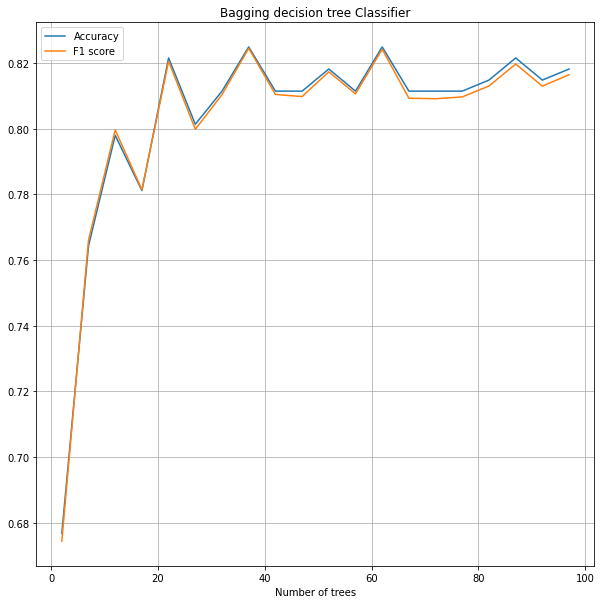

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(nm_lrs, acc_save)
plt.plot(nm_lrs, f1_save)
plt.grid()
plt.xlabel("Number of trees")
plt.legend(["Accuracy", "F1 score"])
plt.title("Bagging decision tree Classifier")
plt.show()

We can see that after 32 decision tree used in bagging our performance starts to oscillate. So around 32 agorithm is an optimal number of bagging.

Decision tree is an unstable algorithm so it's expected that bagging can improve our metrics a lot.

I think that optimal tree depth will be lower compared to one decision tree as with bagging we can reduce error of our algorithm without using more coplex trees.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
pca = PCA(n_components=15)

parameters = {'n_estimators':range(2, 100, 5)}
clf = GridSearchCV(RandomForestClassifier(random_state=0, max_depth=11), parameters, n_jobs=4)

ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

ppl.fit(X_train, y_train)


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 GridSearchCV(estimator=RandomForestClassifier(max_depth=11,
                                                               random_state=0),
                              n_jobs=4,
                              param_grid={'n_estimators': range(2, 100, 5)}))])

In [ ]:
print (clf.best_score_, clf.best_params_) 

ppl_best = Pipeline(steps=[("Normalize", StandardScaler()),("PCA", pca), ("classifier", clf.best_estimator_)])
ppl_best.fit(X_train, y_train)

0.7740617180984153 {'n_estimators': 97}


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 RandomForestClassifier(max_depth=11, n_estimators=97,
                                        random_state=0))])

In [ ]:
y_pred = ppl_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.8181818181818182
0.8181818181818182
0.8162245046805574
0.8175971038967197
[0.98734177 0.66197183 0.7012987  0.91428571]


Our optimal numer of trees is 77. It's is different from our results with bagging.  We found optimal number of trees with greed search - so we might be in an oscillation zone, but get some maximum spike.

Also random forest split tree using only subset of features. So, we might need bigger number of trees to reduce error of algorithm.

#### 2.8. Gradient boosting
Now select the gradient boosting framework you prefer (LightGBM, XGBoost, CatBoost) and repeat the same experiments.

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal size of the you've got? Explain the results briefly.

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 97 kB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
pca = PCA(n_components=15)
ppl = Pipeline(steps=[("Normalize", StandardScaler()),("PCA", pca)])

In [ ]:
catboost2 = CatBoostClassifier(random_seed=4, verbose=0, learning_rate=1, num_trees=4000, depth=8)#2000
catboost2_train = Pool(data = ppl.fit_transform(X_train), label=y_train)
catboost2.fit(catboost2_train)

In [ ]:
y_pred = catboost2.predict(ppl.transform(X_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.8417508417508418
0.8417508417508418
0.838484818514061
0.8403390880915961
[0.99363057 0.69172932 0.75308642 0.91549296]


We have a lot of parameters in gradient boosting so it's hard to do a full greed earch for them.

 Generally, restricting max tree depth is useful for improving peed of convergency but it's not always improve performance significantly. So we chose max depth from speed of convergency consideratons

We use default number of iteration for catboost, so we need to big learning rate in order to sucsessfully converge.

We choose number of trees for gradient boosting as a compromise between metrics results, speed of convergency.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
X_train.size

10431

In [ ]:
# YOUR CODE HERE
data_split_x = np.array_split(X_train, 10)
data_split_y = np.array_split(y_train, 10)

In [ ]:
dset_x = data_split_x[0]
dset_y = data_split_y[0]
acc_save = []
f1_save = []
for dataset_x,dataset_y  in zip(data_split_x[1::], data_split_y[1::]):
    dset_x = np.vstack((dset_x, dataset_x))
    dset_y = np.hstack((dset_y, dataset_y))

    pca = PCA(n_components= 15)
    clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)

    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])
    ppl.fit(X_train, y_train)

    ppl.fit(dset_x, dset_y)

    y_pred = ppl.predict(X_test)
    acc_save.append(accuracy_score(y_test, y_pred))
    f1_save.append(f1_score(y_test, y_pred, average='weighted'))
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='weighted'))
    print("\n")

0.7171717171717171
0.7197541266592805


0.7542087542087542
0.7567370194428177


0.7508417508417509
0.7518601494887852


0.7676767676767676
0.7675429061086712


0.8013468013468014
0.8022373822738195


0.8249158249158249
0.8234376821242404


0.8013468013468014
0.7991860775708991


0.797979797979798
0.796570499791996


0.7845117845117845
0.7829712589138914




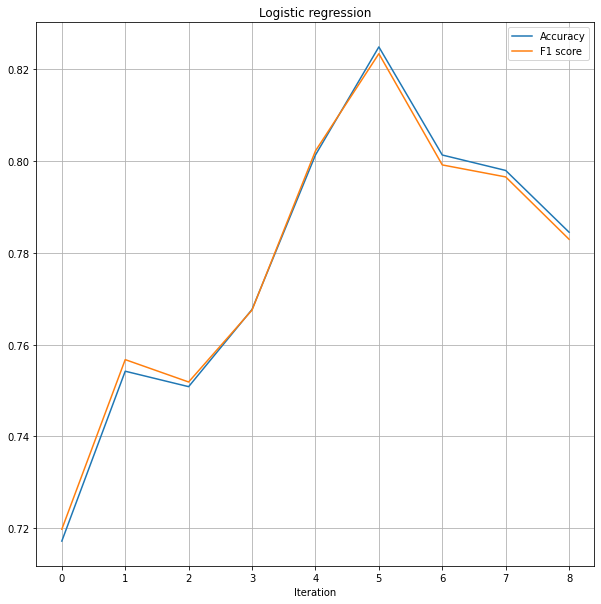

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(acc_save)
plt.plot(f1_save)
plt.grid()
plt.xlabel("Iteration")
plt.legend(["Accuracy", "F1 score"])
plt.title("Logistic regression")
plt.show()

In [ ]:
dset_x = data_split_x[0]
dset_y = data_split_y[0]
acc_save = []
f1_save = []
for dataset_x,dataset_y  in zip(data_split_x[1::], data_split_y[1::]):
    dset_x = np.vstack((dset_x, dataset_x))
    dset_y = np.hstack((dset_y, dataset_y))

    pca = PCA(n_components=15)

    parameters = {'max_depth':range(1, 15)}
    clf = GridSearchCV(RandomForestClassifier(random_state=0), parameters, n_jobs=4)
    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

    ppl.fit(dset_x, dset_y)

    y_pred = ppl.predict(X_test)
    acc_save.append(accuracy_score(y_test, y_pred))
    f1_save.append(f1_score(y_test, y_pred, average='weighted'))
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='weighted'))
    print("\n")

0.67003367003367
0.6546194740272152


0.7272727272727273
0.7073003999094171


0.7306397306397306
0.7275276837741927


0.734006734006734
0.733363709737917


0.7474747474747475
0.7447745470339628


0.7845117845117845
0.7813079976458216


0.7676767676767676
0.7658125472513244


0.7946127946127947
0.7925506249880251


0.7710437710437711
0.770123563333139




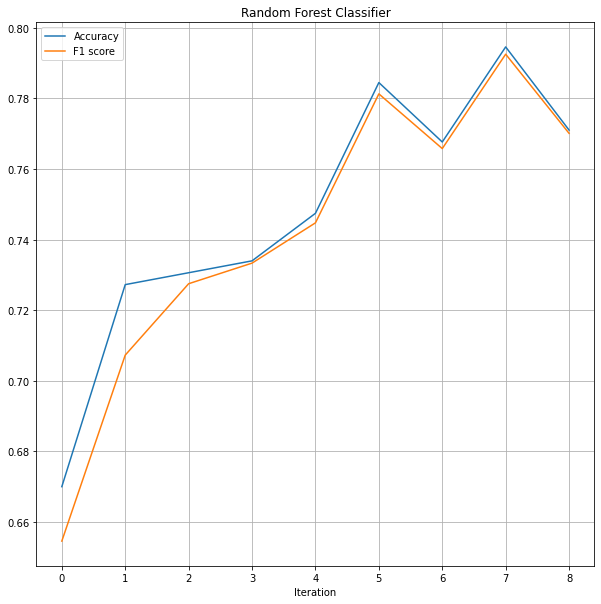

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(acc_save)
plt.plot(f1_save)
plt.grid()
plt.xlabel("Iteration")
plt.legend(["Accuracy", "F1 score"])
plt.title("Random Forest Classifier")
plt.show()

In [ ]:
dset_x = data_split_x[0]
dset_y = data_split_y[0]
acc_save = []
f1_save = []
for dataset_x,dataset_y  in zip(data_split_x[1::], data_split_y[1::]):
    dset_x = np.vstack((dset_x, dataset_x))
    dset_y = np.hstack((dset_y, dataset_y))

    pca = PCA(n_components=15)

    parameters = {'max_depth':range(1, 15)}
    clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

    ppl.fit(dset_x, dset_y)

    y_pred = ppl.predict(X_test)
    acc_save.append(accuracy_score(y_test, y_pred))
    f1_save.append(f1_score(y_test, y_pred, average='weighted'))
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='weighted'))
    print("\n")

0.46464646464646464
0.4638243250256237


0.5488215488215489
0.5535482030538145


0.5824915824915825
0.5841522487987134


0.5521885521885522
0.5587032805472463


0.632996632996633
0.6316239359905376


0.6801346801346801
0.6774466136218046


0.6801346801346801
0.6796744422643703


0.6902356902356902
0.6867351826831743


0.6936026936026936
0.6911742967837159




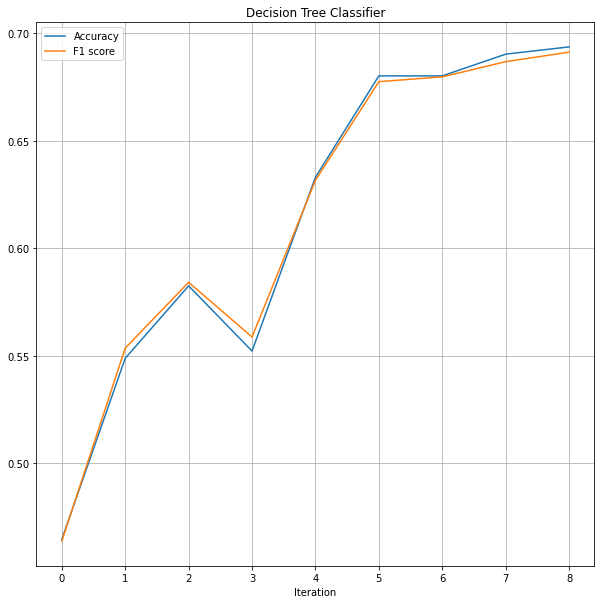

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(acc_save)
plt.plot(f1_save)
plt.grid()
plt.xlabel("Iteration")
plt.legend(["Accuracy", "F1 score"])
plt.title("Decision Tree Classifier")
plt.show()

We can see that generally our metrics are getting better with increase in training samples. But someimes we can get worse performance with it. 

It can be easily explained. We separated our training samples with np.split and didn't take into account how many sampes of each class in each part. So, when we add the next sample to training it can have very imbalance classes and therefore it can make our raining dataset imbalanced. In that case we can overfit for more frequent class but underfit for less frequent class. Tis can explain loss of performance in some cases